In [1]:
import networkx as nx
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy
from collections import deque
import seaborn as sns
from matplotlib.pyplot import cm
import colormaps as cmaps

In [2]:
plt.rc('xtick', labelsize=26) # fontsize of the tick labels
plt.rc('ytick', labelsize=20) # fontsize of the tick labels
plt.rc('legend', fontsize=26)
plt.rcParams['axes.linewidth'] = 0.2 #set the value globally

In [3]:
#Create bar plots for paper as defined 
def barPlots(specDict, showTitle=False):
    plt.figure(figsize=specDict['plotSize'])
    plt.rc('xtick', labelsize=42) # fontsize of the tick labels
    plt.rc('ytick', labelsize=42) # fontsize of the tick labels
    plt.rc('legend', fontsize=26)
    plt.ylim([0, 1.2])
    barWidth = 0.2

    my_cmap = plt.get_cmap("viridis")

    #Specify X-axis
    X_axis = np.arange(len(specDict['datasetNames']))
    plt.bar(X_axis - 0.3, specDict['Pipage'], barWidth, label='Pipage', color=my_cmap(0.2), hatch='*')
    plt.bar(X_axis - 0.1, specDict['RandPipage'], barWidth, label='RPipage', color=my_cmap(0.9), hatch='+')
    plt.bar(X_axis + 0.1, specDict['Greedy'], barWidth, label='Greedy', color=my_cmap(0.4), hatch='x')
    plt.bar(X_axis + 0.3, specDict['Random'], barWidth, label='Random', color=my_cmap(0.75), hatch='//')

    if showTitle:
        title_text = specDict['plotTitle']
        plt.title(title_text, fontsize=specDict['titleFontSize'])

#     plt.yscale("log")
    plt.xticks(X_axis, specDict['datasetNames'])
#     plt.xlabel(specDict['xlab'], fontsize=specDict['axisFontSize'])
    plt.ylabel(specDict['ylab'], fontsize=specDict['axisFontSize']) 
    plt.legend(loc='best', fontsize=32, bbox_to_anchor=(1, 1))
    

#     ax = plt.gca()
#     ax.tick_params(axis='x', labelrotation = 45)
    plt.tight_layout()
    plt.savefig(specDict['saveFileName'], pad_inches=1)
    plt.show()



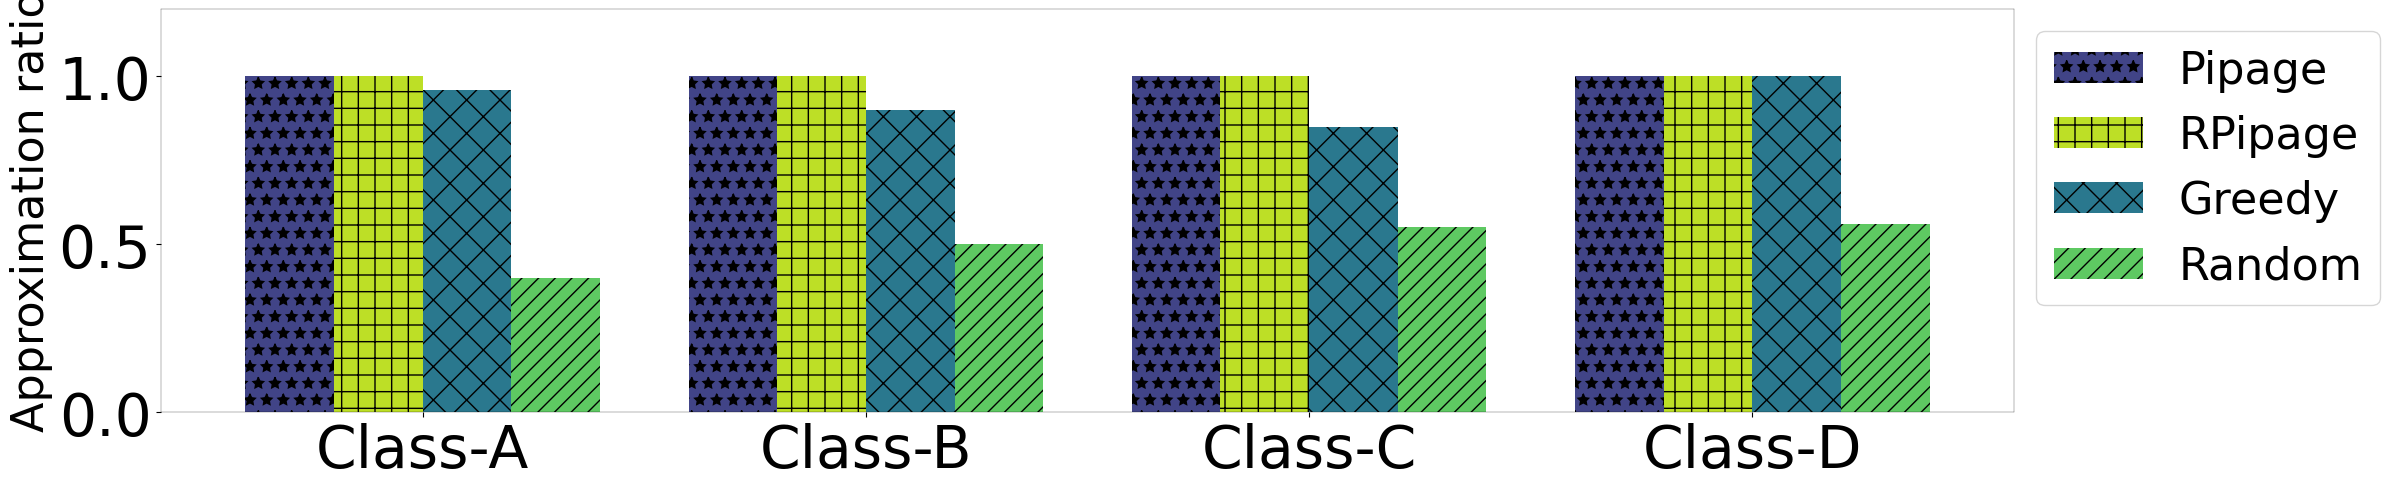

In [4]:
#Specify dictionary for plotting for all Datasets
barPlot_Inverse = {
    'datasetNames': ['Class-A', 'Class-B', 'Class-C', 'Class-D'], 
    'plotSize': (24, 5), 
    'barColors': ['teal', 'steelblue', 'slateblue', 'mediumpurple'],
    'Pipage': [1, 1, 1, 1], 
    'RandPipage': [1, 1, 1, 1],
    'Greedy': [0.96, 0.90, 0.85, 1], 
    'Random': [0.40, 0.50, 0.55, 0.56],
    'xlab': 'Dataset', 
    'ylab': 'Approximation ratio' ,
    'plotTitle': '', 
    'axisFontSize': 32, 
    'titleFontSize': 14,
    'saveFileName': './educationalDatasetsCompRatios_Inverse.pdf'
}
barPlots(barPlot_Inverse)

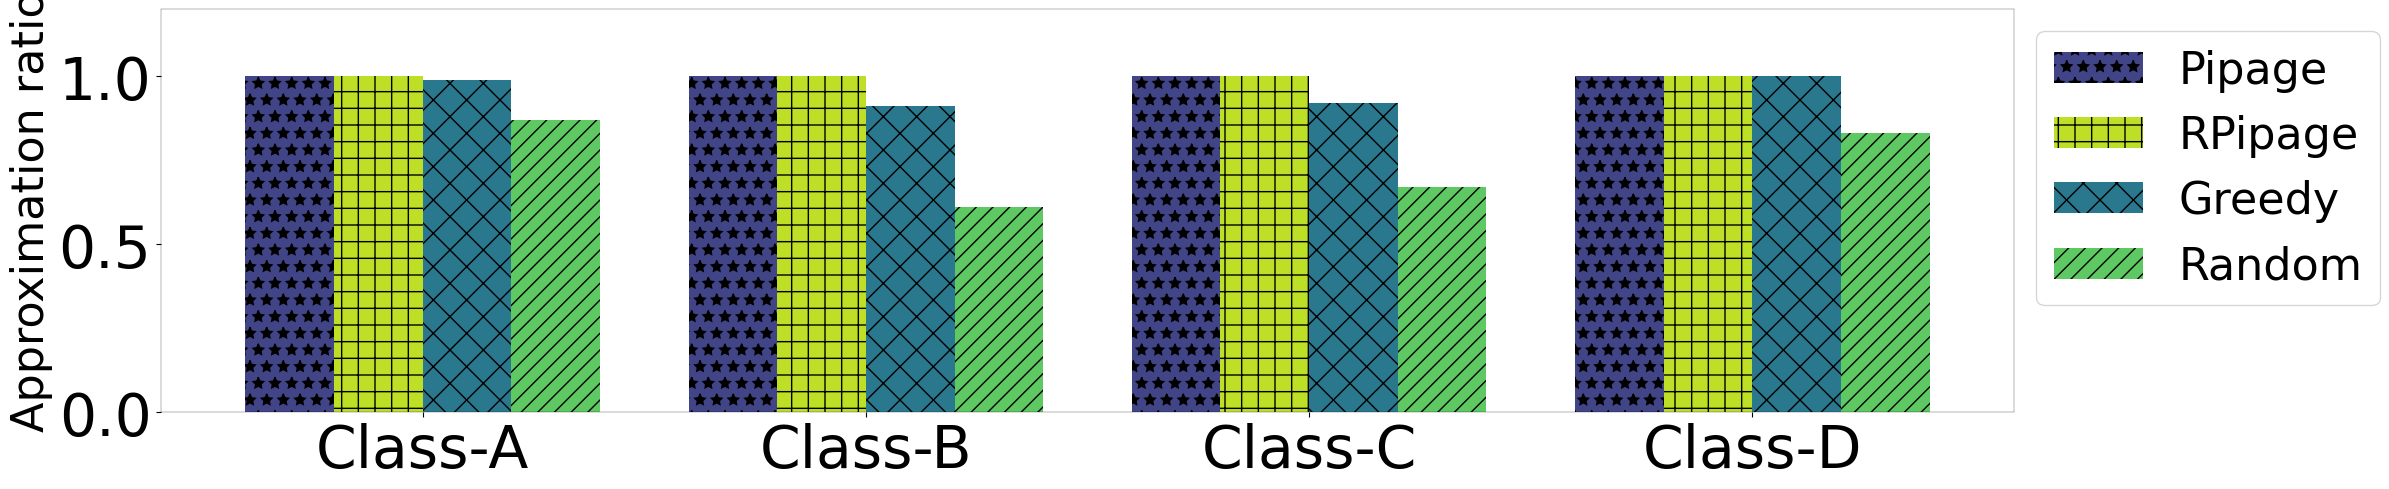

In [5]:
#Specify dictionary for plotting for all Datasets
barPlotSpecs_all= {
    'datasetNames': ['Class-A', 'Class-B', 'Class-C', 'Class-D'], 
    'plotSize': (24, 5), 
    'barColors': ['teal', 'steelblue', 'slateblue', 'mediumpurple'],
    'Pipage': [1, 1, 1, 1], 
    'RandPipage': [1, 1, 1, 1],
    'Greedy': [0.99, 0.91, 0.92, 1], 
    'Random': [0.87, 0.61, 0.67, 0.83],
    'xlab': 'Dataset', 
    'ylab': 'Approximation ratio' ,
    'plotTitle': '', 
    'axisFontSize': 32, 
    'titleFontSize': 14,
    'saveFileName': './educationalDatasetsCompRatios_LinNorm.pdf'
}
barPlots(barPlotSpecs_all)

In [6]:
def hyperparameterPlots(xdict, ydict, save_file):
    plt.rc('xtick', labelsize=12) # fontsize of the tick labels
    plt.rc('ytick', labelsize=12) # fontsize of the tick labels
    plt.rc('legend', fontsize=10)
    
    for j in range(1, 5):
        plt.subplot(2, 2, j)
        xs = xdict[j]
        ys = ydict[j]
        # Create a dictionary to group lambda values by (x, y) pairs
        data_dict = {}
        for i in range(len(lambdas)):
            xy_pair = (xs[i], ys[i])
            if xy_pair not in data_dict:
                data_dict[xy_pair] = []
            data_dict[xy_pair].append(lambdas[i])

        # Create a scatter plot and label points with lambda values
        for xy_pair, ls in data_dict.items():
            x, y = xy_pair
            if len(ls) > 3:
                label = 'α = ' + f'{ls[0]} - {ls[-1]}'
            else:
                label = 'α = ' + ', '.join([f"{l}" for l in ls])
            plt.scatter(x, y, label=label, s=50, zorder=2)  # s is marker size

        plt.plot(xs, ys, linestyle='--', marker='', color='black', zorder=1)
        plt.xlabel('project term')
        plt.ylabel('conflict term')
        plt.title(f'Class {chr(j + 64)}')
        
        plt.tight_layout(pad=1)
        plt.legend(loc='lower left', labelspacing=0.1)
    plt.savefig(save_file, bbox_inches='tight')
    plt.show()

/scratch/4529395.1.csdata/ipykernel_3836769/2501256437.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1)


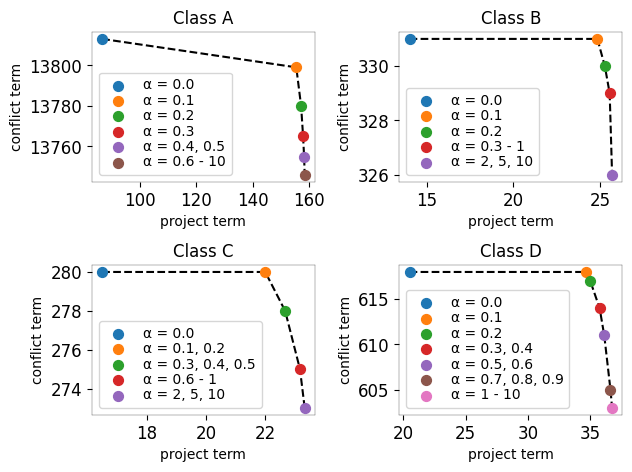

In [7]:
lambdas = list(np.round(np.arange(0, 1, 0.1), 1)) + [1, 2, 5, 10]
# LinNorm
xdict = {
    1: [86.43,155.57,157.29,158.0,158.36,158.36,158.57,158.57,158.57,158.57,158.57,158.57,158.57,158.57], # 506
    2: [14, 24.86, 25.29, 25.57, 25.57, 25.57, 25.57, 25.57, 25.57, 25.57, 25.57, 25.71, 25.71, 25.71], # 519
    3: [16.5,22.0,22.0,22.67,22.67,22.67,23.17,23.17,23.17,23.17,23.17,23.33,23.33,23.33], # 549
    4: [20.5,34.62,35.0,35.75,35.75,36.12,36.12,36.62,36.62,36.62,36.75,36.75,36.75,36.75] # 701
}
ydict = {
    1: [13813.0,13799.0,13780.0,13765.0,13755.0,13755.0,13746.0,13746.0,13746.0,13746.0,13746.0,13746.0,13746.0,13746.0],
    2: [331, 331, 330, 329, 329, 329., 329., 329., 329., 329., 329., 326., 326., 326.],
    3: [280.0,280.0,280.0,278.0,278.0,278.0,275.0,275.0,275.0,275.0,275.0,273.0,273.0,273.0],
    4: [618.0,618.0,617.0,614.0,614.0,611.0,611.0,605.0,605.0,605.0,603.0,603.0,603.0,603.0]
}
hyperparameterPlots(xdict, ydict, 'hyperparameter_edu_linnorm.pdf')

/scratch/4529395.1.csdata/ipykernel_3836769/2501256437.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1)


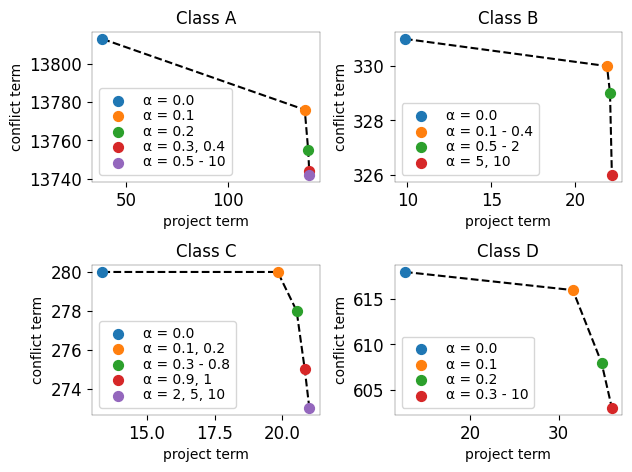

In [8]:
# Inverse
xdict = {
    1: [38.14,138.17,139.86,140.38,140.38,140.43,140.43,140.43,140.43,140.43,140.43,140.43,140.43,140.43], # 506
    2: [9.85,21.88,21.88,21.88,21.88,22.06,22.06,22.06,22.06,22.06,22.06,22.06,22.17,22.17], # 519
    3: [13.35,19.83,19.83,20.53,20.53,20.53,20.53,20.53,20.53,20.83,20.83,21.0,21.0,21.0], # 549
    4: [12.64,31.59,34.83,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0] # 701
}
ydict = {
    1: [13813.0,13776.0,13755.0,13744.0,13744.0,13742.0,13742.0,13742.0,13742.0,13742.0,13742.0,13742.0,13742.0,13742.0],
    2: [331.0,330.0,330.0,330.0,330.0,329.0,329.0,329.0,329.0,329.0,329.0,329.0,326.0,326.0],
    3: [280.0,280.0,280.0,278.0,278.0,278.0,278.0,278.0,278.0,275.0,275.0,273.0,273.0,273.0],
    4: [618.0,616.0,608.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0]
}
hyperparameterPlots(xdict, ydict, 'hyperparameter_edu_inverse.pdf')